# Problem statement

In this data analysis project, the goal is to identify the most frequent food items ordered in a specific locality where a significant number of bachelors reside. The insights from this analysis will be used to inform the opening of a new food chain that caters to the preferences of the local bachelor population.

### Step 1: - Importing all the Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Step 2: - Read the Data

In [2]:
orders = pd.read_excel('ZOMATO ORDERS_.xlsx')

In [3]:
orders

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment Mode
0,4983358497,Rabdi Wala,280.05,2023-06-29 00:00:00,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023-06-29 00:00:00,"Kandivali West, Mumbai","Red Paneer Toofani, 3 x Butter Chapati",Delivered
2,4980379312,WOW! Momo,256.90,2023-06-26 00:00:00,"Kandivali East, Mumbai",2 x Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023-06-18 00:00:00,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023-06-13 00:00:00,"Kandivali East, Mumbai","2 x Baked Chicken Herb Roll, 1 x Dutch Truffle...",Delivered
...,...,...,...,...,...,...,...
339,1554143115,Mumbai Dreamz,257.25,2017-11-16 13:57:00,"Kandivali East, Mumbai","Chicken Handi, 1 x Butter Naan",Cash
340,1039818546,Pizza Hut,551.26,2017-11-15 15:34:00,"Kandivali East, Mumbai","Exotica, 1 x Veggie Supreme",Cash
341,1141166320,MOJO Pizza - 2X Toppings,319.08,2017-11-13 15:14:00,"Kandivali East, Mumbai","Farm Fresh Big 10"", 1 x Chocolate Brownie",Cash
342,1422962961,MOJO Pizza - 2X Toppings,264.20,2017-11-09 14:31:00,"Kandivali East, Mumbai","Farm Fresh Big 10""",Cash


In [6]:
orders.head()

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment Mode
0,4983358497,Rabdi Wala,280.05,2023-06-29,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023-06-29,"Kandivali West, Mumbai","Red Paneer Toofani, 3 x Butter Chapati",Delivered
2,4980379312,WOW! Momo,256.90,2023-06-26,"Kandivali East, Mumbai",2 x Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023-06-18,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023-06-13,"Kandivali East, Mumbai","2 x Baked Chicken Herb Roll, 1 x Dutch Truffle...",Delivered


In [7]:
orders.tail()

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment Mode
339,1554143115,Mumbai Dreamz,257.25,2017-11-16 13:57:00,"Kandivali East, Mumbai","Chicken Handi, 1 x Butter Naan",Cash
340,1039818546,Pizza Hut,551.26,2017-11-15 15:34:00,"Kandivali East, Mumbai","Exotica, 1 x Veggie Supreme",Cash
341,1141166320,MOJO Pizza - 2X Toppings,319.08,2017-11-13 15:14:00,"Kandivali East, Mumbai","Farm Fresh Big 10"", 1 x Chocolate Brownie",Cash
342,1422962961,MOJO Pizza - 2X Toppings,264.20,2017-11-09 14:31:00,"Kandivali East, Mumbai","Farm Fresh Big 10""",Cash
343,42591339,Mumbai Dreamz,325.50,2017-11-03 23:36:00,"Kandivali East, Mumbai",Chicken Tandoori,Cash


In [9]:
orders.isnull().sum()

Order ID           0
Restaurant Name    0
Price              0
Date               0
Order Location     0
Item Ordered       0
Payment Mode       6
dtype: int64

In [16]:
orders.duplicated().sum()

10

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         344 non-null    int64         
 1   Restaurant Name  344 non-null    object        
 2   Price            344 non-null    float64       
 3   Date             344 non-null    datetime64[ns]
 4   Order Location   344 non-null    object        
 5   Item Ordered     344 non-null    object        
 6   Payment Mode     338 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.9+ KB


In [20]:
orders['Payment Mode'].value_counts()

Delivered             170
Cash                  108
Payment Incomplete     28
Cash on Delivery       28
Refund Completed        1
Refunded                1
Online Payment          1
Incomplete Payment      1
Name: Payment Mode, dtype: int64

In [21]:
#  Upon reviewing the data in the 'Payment Mode' column, it's evident that incorrect entries are present.
#  To address this, I propose renaming the column to 'Payment Status' for clarity. Additionally, I suggest
#  updating the entries containing 'Cash' and 'Cash on Delivery' to simply 'Delivered', ensuring consistency
#  and accurate representation of payment statuses.

# The above mentioned operations are performed in the step 3: - Data Cleansing and preprocessing

### Step 3: - Data Cleansing and preprocessing

In [4]:
orders.rename(columns = {'Payment Mode': 'Payment status'}, inplace = True)

In [5]:
orders.head()

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment status
0,4983358497,Rabdi Wala,280.05,2023-06-29,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023-06-29,"Kandivali West, Mumbai","Red Paneer Toofani, 3 x Butter Chapati",Delivered
2,4980379312,WOW! Momo,256.90,2023-06-26,"Kandivali East, Mumbai",2 x Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023-06-18,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023-06-13,"Kandivali East, Mumbai","2 x Baked Chicken Herb Roll, 1 x Dutch Truffle...",Delivered


In [6]:
orders['Payment status'] = orders['Payment status'].replace('Cash', 'Delivered')
orders['Payment status'] = orders['Payment status'].replace('Cash on Delivery', 'Delivered')
orders['Payment status'] = orders['Payment status'].replace(' Online Payment ', 'Delivered')
orders['Payment status'] = orders['Payment status'].replace('Payment Incomplete', 'Undelivered')

In [7]:
orders['Payment status'].value_counts()

Delivered             306
Undelivered            28
Refund Completed        1
Refunded                1
Online Payment          1
Incomplete Payment      1
Name: Payment status, dtype: int64

### dealing with null values and duplicates

In [8]:
orders = orders.drop_duplicates()

In [9]:
orders.duplicated().sum()

0

In [10]:
orders.isnull().sum()

Order ID           0
Restaurant Name    0
Price              0
Date               0
Order Location     0
Item Ordered       0
Payment status     6
dtype: int64

In [40]:
## Since there are only null values present in the 'payment status' column, which is of the object data type,
## our approach will involve replacing these null values with the mode of the column.

In [11]:
orders['Payment status'] = orders['Payment status'].fillna(orders['Payment status'].mode()[0])

C:\Users\Saurav\AppData\Local\Temp\ipykernel_19120\1078631517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Payment status'] = orders['Payment status'].fillna(orders['Payment status'].mode()[0])


In [ ]:
# Next, we will proceed to format the dates correctly and standardize the items that were ordered. 
# This is necessary because for certain orders, quantities appear multiple times,
# such as "2 * momos". Our objective is to analyze the order frequency 
# rather than focusing on the specific quantities ordered together.

In [12]:
orders['Date'] = pd.to_datetime(orders['Date'])

C:\Users\Saurav\AppData\Local\Temp\ipykernel_19120\2956895260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Date'] = pd.to_datetime(orders['Date'])


In [13]:
orders['Item Ordered'] = orders['Item Ordered'].apply(lambda x: x.split('x')[-1].strip())

C:\Users\Saurav\AppData\Local\Temp\ipykernel_19120\371527289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Item Ordered'] = orders['Item Ordered'].apply(lambda x: x.split('x')[-1].strip())


In [14]:
orders.iloc[0:50]

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment status
0,4983358497,Rabdi Wala,280.05,2023-06-29,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023-06-29,"Kandivali West, Mumbai",Butter Chapati,Delivered
2,4980379312,WOW! Momo,256.90,2023-06-26,"Kandivali East, Mumbai",Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023-06-18,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023-06-13,"Kandivali East, Mumbai",Dutch Truffle Pastry,Delivered
5,4939522120,Arabian Shawarma Cafe,223.23,2023-06-10,"Borivali West, Mumbai",Classic Chicken Shawarma,Delivered
6,4941315936,Ovenstory Pizza,423.15,2023-06-09,"Kandivali East, Mumbai",Chicken Kheema Lasagne,Delivered
7,4935306215,Chinese Wok,187.95,2023-06-07,"Kandivali East, Mumbai",Chicken Manchurian Bowl,Undelivered
8,4922795029,The French Connection Cake Shop,202.56,2023-06-06,"Kandivali East, Mumbai",Dutch Truffle Pastry,Delivered
9,4925406071,Radhe Dhokla,238.50,2023-06-05,"Kandivali West, Mumbai",Red Paneer Toofani,Delivered


In [15]:
orders.iloc[100:150]

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment status
110,4029141907,Surbhi,444.00,2022-05-05,"Kandivali East, Mumbai",Methi Matar Masala,Delivered
111,4026985282,Ambience All Day Dining,366.00,2022-05-09,"Kandivali East, Mumbai",Tandoori Murgh,Delivered
112,4037510143,Bhukkad Garage,265.00,2022-05-09,"Kandivali East, Mumbai",Chicken Triple Noodles,Delivered
113,4042975517,Sahara Restaurant,368.70,2022-05-11,"Malad East, Mumbai",Tandoori Roti,Delivered
114,4049959876,Surbhi,298.25,2022-05-14,"Kandivali East, Mumbai",Roti,Delivered
115,4041896837,Sahara Restaurant,556.10,2022-05-16,"Malad East, Mumbai",Tandoori Roti,Delivered
116,4043311450,Ambience All Day Dining,276.75,2022-05-17,"Kandivali East, Mumbai",Chicken Triple Schezwan Noodles,Delivered
117,4062540647,Bamboo Kitchen,233.95,2022-05-18,"Malad East, Mumbai",Chicken Dum Biryani,Undelivered
118,3954009373,Breadkraft,197.00,2022-02-28,"Kandivali East, Mumbai",Chicken Afghani Frankie,Undelivered
119,2414306834,WOW! Momo,153.82,2022-02-22,"Kandivali East, Mumbai","Steamed Darjeeling Chicken Momo [2 Plates, 10 ...",Delivered


### Step 4: - EDA

In [20]:
from wordcloud import WordCloud

In [21]:
text_data = ''.join(orders['Item Ordered'])

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)


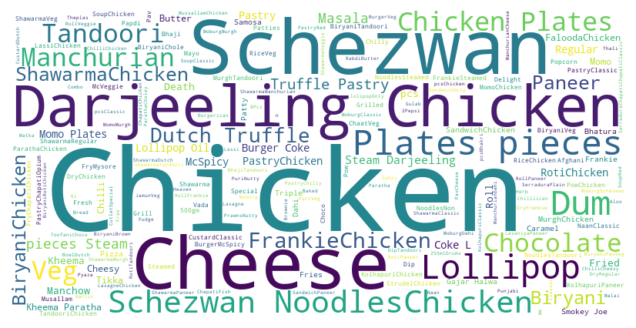

In [25]:
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

By employing word cloud analysis, we have successfully identified the items  that are ordered more frequently on the Zomato platform by bachelors. 

In [54]:
# Doing the analysis of most orderd Items ordered columns

orders['Item Ordered'].value_counts().head(15)

Chicken Dum Biryani                                      14
Steam Darjeeling Chicken [1+1] : 2 Plates [10 pieces]    12
Chicken Schezwan Noodles                                 11
Classic Chicken Shawarma                                 10
Chapati                                                   8
Tandoori Roti                                             7
Chicken Lollipop, Chicken Schezwan Noodles                6
Veg Kolhapuri                                             6
Steamed Darjeeling Chicken Momo [2 Plates, 10 Pieces]     6
2 McSpicy Chicken Burger + Coke (L)                       6
Tandoori Murgh                                            6
Dutch Truffle Pastry                                      6
Chicken Darjeeling Steam Momo                             6
Veg Manchurian                                            5
Chicken Tandoori                                          4
Name: Item Ordered, dtype: int64

From the above analysis we can see that some of the popular and most ordered Food Items are Biryani , Momos , Chicken Shawrama , 
Tandoori Chicken and Chinese dishes such as Chicken Lollipop and Chicken  Schezwan Noodles.
 


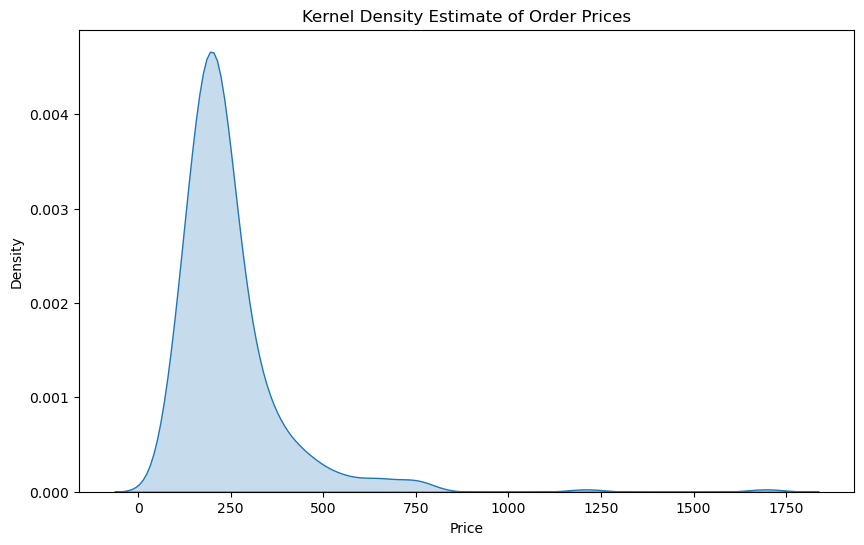

In [27]:
# Determining the Preferred Price Range of Food by Customers

plt.figure(figsize=(10, 6))
sns.kdeplot(orders['Price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Order Prices')
plt.show()

The provided graph highlights an interesting insight—the majority of ordered dishes fall within the price range of 250. However, to gain a deeper understanding of the data, it's essential to conduct a more detailed analysis of price densities across different years. Given that the dataset spans the last six years (starting from 2017), it's plausible that prices have undergone changes during this time span. Focusing on the price density analysis for recent years is particularly relevant.

By delving into the price density analysis year by year, we can uncover nuanced trends in dish prices. This is crucial for comprehending how prices have evolved over time, especially considering the potential impact of inflation or market dynamics. Such insights can be pivotal for making informed decisions in the ever-changing food industry landscape.

In [31]:
# The date format will be transformed to exclusively include years in the date column. 
# This adjustment enables a focused year-wise price analysis. By isolating the years, 
# we can effectively assess price trends over time, providing insights into how dish prices have evolved within each year. 
# This streamlined approach enhances the accuracy of our analysis by eliminating unnecessary granularity and concentrating on 
# meaningful yearly trends.


orders['Date'] = orders['Date'].dt.year

C:\Users\Saurav\AppData\Local\Temp\ipykernel_19120\2747878071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['Date'] = orders['Date'].dt.year


In [33]:
# As we can see only year appears in the 'date' column so now 
# we will rename the 'date' column to 'order_year' 

orders.head()

,Order ID,Restaurant Name,Price,Date,Order Location,Item Ordered,Payment status
0,4983358497,Rabdi Wala,280.05,2023,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023,"Kandivali West, Mumbai",Butter Chapati,Delivered
2,4980379312,WOW! Momo,256.90,2023,"Kandivali East, Mumbai",Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023,"Kandivali East, Mumbai",Dutch Truffle Pastry,Delivered


In [34]:
orders.rename(columns = {'Date':'order_year'}, inplace = True)

C:\Users\Saurav\AppData\Local\Temp\ipykernel_19120\797942401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.rename(columns = {'Date':'order_year'}, inplace = True)


In [36]:
# As we can see the 'Date' column has been renamed
# now we will move ahead with the analysis

orders.head()

,Order ID,Restaurant Name,Price,order_year,Order Location,Item Ordered,Payment status
0,4983358497,Rabdi Wala,280.05,2023,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023,"Kandivali West, Mumbai",Butter Chapati,Delivered
2,4980379312,WOW! Momo,256.90,2023,"Kandivali East, Mumbai",Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023,"Kandivali East, Mumbai",Dutch Truffle Pastry,Delivered


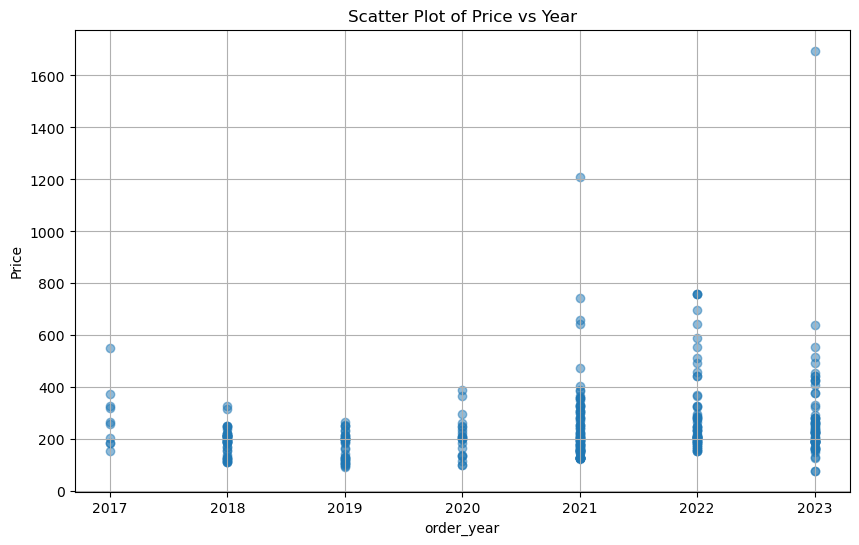

In [43]:
## Doing the analysis of price and year column using the scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(orders['order_year'], orders['Price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Year')
plt.xlabel('order_year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The scatter plot conveys a notable observation: over the recent years, the prices of a significant portion of ordered items tend to gravitate around the price range of 150 to 300. This concentration of data points within this range implies a consistent trend in pricing for these items. This observation could be indicative of factors like consumer preferences, competitive dynamics, or economic influences. Such insights contribute to a deeper understanding of the Zomato orders dataset and its underlying pricing trends.

In [ ]:
# To ensure relevance, we will concentrate on the recent 2-3 years, considering that
# pricing dynamics may have experienced significant changes in the last 5-6 years.
# Therefore, our analysis will focus on data starting from 2021 onwards.
# So we are creating new dataset which has orders only of 2021,2022 and 2023

new_df = orders[(orders['order_year'] == 2021) |(orders['order_year'] == 2022) | (orders['order_year'] == 2023)]

In [87]:
new_df

,Order ID,Restaurant Name,Price,order_year,Order Location,Item Ordered,Payment status
0,4983358497,Rabdi Wala,280.05,2023,"Borivali West, Mumbai","Theplas With Aloo Ki Sabzi Combo, Matka Malai ...",Delivered
1,4988648204,Radhe Dhokla,222.20,2023,"Kandivali West, Mumbai",Butter Chapati,Delivered
2,4980379312,WOW! Momo,256.90,2023,"Kandivali East, Mumbai",Chicken Darjeeling Steam Momo,Delivered
3,4960635467,Sahara Restaurant,452.60,2023,"Malad East, Mumbai","Murgh Musallam, Caramel Custard",Delivered
4,4950519700,The French Connection Cake Shop,202.56,2023,"Kandivali East, Mumbai",Dutch Truffle Pastry,Delivered
...,...,...,...,...,...,...,...
222,1357963515,Mirch,223.82,2021,"Borivali East, Mumbai",Chicken Schezwan Noodles,Delivered
223,1161334973,Breadkraft,207.00,2021,"Kandivali East, Mumbai",Chicken Cheese Frankie,Delivered
224,2004860234,Breadkraft,207.00,2021,"Kandivali East, Mumbai",Chicken Cheese Frankie,Delivered
225,1771643517,Surbhi,276.40,2021,"Kandivali East, Mumbai","Paneer Schezwan, Tandoori Paneer Paratha",Delivered


In [167]:
# Based on wordcloud analysis and value_counts of items ordered we will plot 
# the averages of the below top 5 dishes

items_to_plot = ["Chicken Dum Biryani", "Chicken Schezwan Noodles", "Classic Chicken Shawarma" , "Chicken Lollipop",
                "Tandoori Murgh", "Steamed Darjeeling Chicken Momo [2 Plates, 10 Pieces]"]

In [168]:
filtered_df = new_df[new_df["Item Ordered"].isin(items_to_plot)]

In [169]:
avg_price_by_item = filtered_df.groupby("Item Ordered")["Price"].mean()

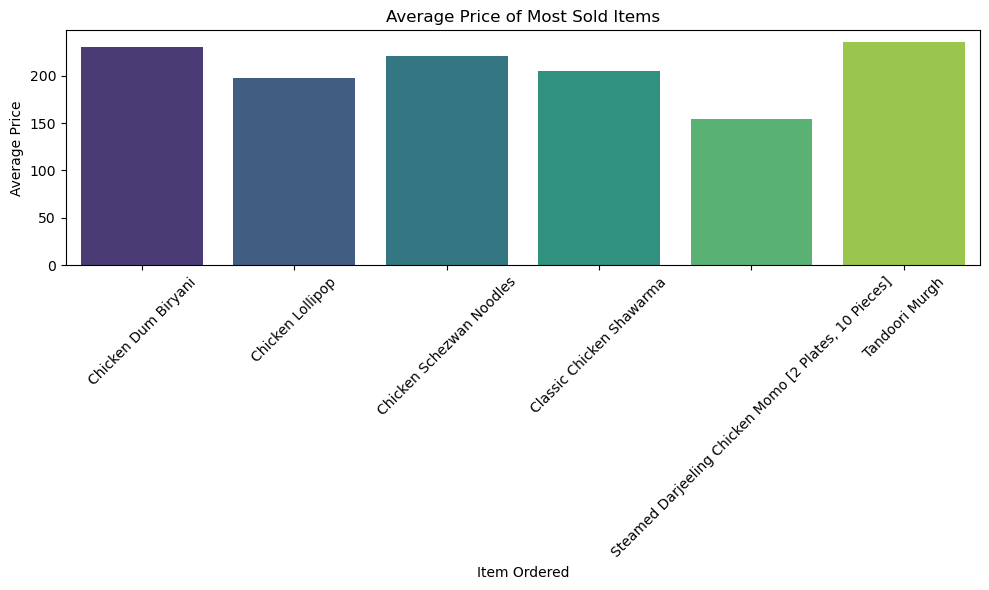

In [172]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_item.index, y=avg_price_by_item.values, palette="viridis")
plt.title("Average Price of Most Sold Items")
plt.xlabel("Item Ordered")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusions


Upon conducting a comprehensive analysis of the data, a compelling pattern emerged, revealing the distinct culinary preferences of the bachelor population. Notably, Chicken Shawarma, Chicken Momos, and Chicken Biryani emerged as the favored choices, alongside Tandoori Chicken and Chinese Items like Chicken Schezwan Noodles and Chicken Lollipop.

To effectively cater to this discerning audience, an essential consideration is maintaining an economically viable pricing strategy. In alignment with these findings, the following price ranges are recommended for the popular dishes:

For the delightful Chicken Momos experience, an appealing pricing spectrum lies within the range of 100 to 150 Rs.

The esteemed Chicken Shawarma, held in high regard, finds its equilibrium within the price span of 180 to 200 Rs

The Chicken Dum Biryani, with a price point approximating 200 to 250 Rs.

Elevating the experience further, the Tandoori Chicken, harmonizes well with a price range spanning 250 to 300 Rs.

Furthermore, as a strategic augmentation to the existing menu, the introduction of Chinese starters, notably Chicken Lollipop and Chicken Schezwan Noodles, is recommended.

Overall The price Range of all the dishes should be between 150 - 300 Rs.